# Тематичне дослідження - сприятливі слова з відгуків про ресторани

In [1]:
# import the required libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot

## Найпопулярніша категорія ресторанів
Сподіваємось, ви подивилися словник даних [тут] (https://www.yelp.com/dataset/documentation/main)
і дійшли висновку, що файл business.json найбільше підходить для отримання відповіді на питання про те, що є найпопулярнішою категорією. Ми завантажуємо дані з файлу. Якщо файл даних знаходиться у папці JSON поряд з цими зошитами, то доступ буде за замовчуванням. Після цього необхідно виконати кілька типових швидких оглядів.

In [2]:
# For convenience here, we are accessing the data in the working directory that contains our notebooks.
# Normal best practise is to keep your data separate, but this keeps things simple.
business = pd.read_json('JSON/business.json', lines=True)

MemoryError: 

In [ ]:
business.shape

In [ ]:
business.head()

In [24]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
business_id     3 non-null object
address         3 non-null object
city            3 non-null object
state           3 non-null object
postal code     3 non-null int64
latitude        3 non-null float64
longitude       3 non-null float64
stars           3 non-null float64
review_count    3 non-null int64
is_open         3 non-null int64
attributes      3 non-null object
categories      3 non-null object
hours           3 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 440.0+ bytes


У цьому наборі даних не всі стовпці нам корисні. Ми майже впевнені, що нас не цікавлять конкретні адресі (address), атрибути (attributes), години роботи (hours), чи все ще відкритий заклад (is_open), широта (latitude) та довгота (longitude) та назва ресторану (name). Ми також вирішуємо, що не будемо проводити аналіз на рівні поштового індексу (postal_code). Тому ці колонки не розглядаємо. Тому наступною дією повинно бути створення списку цих стовпців і видалення їх з DataFrame. Запам’ятайте вісь (axis) та замініть аргументи! Також зауважте, що існує менше ненульових категорій, ніж є business_id. Ми повернемось до цього питання пізніше.

In [25]:
# task: create a list of columns to drop, call it drop_cols
# then go ahead and drop those columns from the DataFrame
# two lines of code here:
drop_cols = ["address", "attributes", "hours", "is_open", "latitude", "longitude", "postal code"]
business = business.drop(drop_cols, axis=1)

In [26]:
business.head()

,business_id,city,state,stars,review_count,categories
0,tnhfDv5Il8EaGSXZGiuQGg,San Francisco,CA,4.5,1198,"[Mexican, Burgers, Gastropubs, Category1, Cate..."
1,anhfDv5Il8EaGSXZGiuQGg,San Francisco,CA,4.5,1198,"[Category1, Category2, Category3]"
2,bnhfDv5Il8EaGSXZGiuQGg,San Francisco,CA,4.5,1198,"[Category1, Category5, Category6]"


Тепер ми маємо в таблиці корисні дані. Пам'ятайте наше перше завдання - визначити найпопулярніший тип ресторану. Зараз ми дивимось на стовпчик категорій. Ми могли б просто порахувати кожну окрему категорію в цьому стовпчику, як це робили в опитуванні власників домашніх тварин. Але наш стовпець категорій не у такому форматі, як ці дані. Кожен елемент у категоріях насправді є рядком, як ми демонструємо нижче, причому кожен пункт, який нас цікавить, знаходиться у рядку і розділений комами.

In [27]:
# print the first element of business['categories']
print(business.categories[0])

['Mexican', 'Burgers', 'Gastropubs', 'Category1', 'Category2']


In [28]:
# what is the type of this element?
type(business.categories[0])

list

In [29]:
# if the first element were a list, this would return 'Tours', not 'T'
business.categories[0][0]

'Mexican'

Тепер ми збираємось використовувати [тут](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html)  метод pandas Series для того, щоб розбити ці рядки на списки.

In [30]:
# task: split the categories column (a pandas Series) into lists of categories,
# e.g. the string "Category1, Category2" becomes the list ["Category1", "Category2"]
# hint: pass the argument pat = ', ?' in to split on a comma which may be followed by a space
business['categories'] = business['categories']

In [31]:
business['categories'].head()

0    [Mexican, Burgers, Gastropubs, Category1, Cate...
1                    [Category1, Category2, Category3]
2                    [Category1, Category5, Category6]
Name: categories, dtype: object

Зараз ми одержали списки типу pandas Series. Далі необіхдно застосувати технологію, яку ми використали при опитуванні власників домашніх тварин. У нас немає необхідності зберігати початковий довгий список категорій. Будемо використовувати метод, який підраховує і виводить перших 20 елементів за один прохід. Це займе для вашого комп'ютера приблизно 1-2 хвилини.

In [32]:
# task: count the frequency of each item in categories and keep the top twenty
# hint: the latter can be done by passing an argument to the head method
# assign the result to the variable category_counts - one line of code here:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().nlargest(20)

Тепер познайомимося з новим видом графіків: бар-графік. Він дає нам візуальне зображення частоти перших 20 категорій.

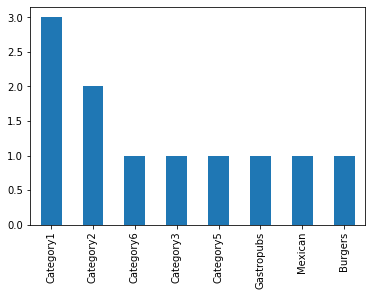

In [33]:
category_counts.plot(kind='bar')

Перший сюрприз - наш набір даних містить більше закладів, ніж просто бажана галузь (Ресторани). Ми отримали не лише ті дані, які нам потрібні. З часом це буде дивувати вас все менше і менше. Насправді, як науковець, ви здивуєтесь, коли хтось надасть вам чистий набір даних, що містить лише ті дані, які вам потрібні! Ресторани, як видно з графіку, є нашим найчастішим видом бізнесу, але вони становлять менше 60000 з розглянутих нами  188000 підприємств. Тепер поставимо перед собою завдання відфільтрувати та зберегти лише ті підприємства, які мають у своєму складі "Ресторан".

Перш ніж ми розпочнемо фільтрацію за категоріями, згадайте те, що на початку було менше ненульових категорій, ніж бізнес_id. Скільки нульових (відсутніх) категорій наявні в даних?

In [34]:
pd.isna(business['categories']).sum()

0

На моїх даних було 482 business_id, які не були пов'язані з жодною категорією. Очевидно, що вони не принесуть ніякої користі. По-перше, ми глянемо на кілька з них, щоб перевірити

In [35]:
business.loc[pd.isna(business['categories'])].head()

,business_id,city,state,stars,review_count,categories


Впевнились, що в стовпці категорій для цих підприємств немає інформації. Тепер видалимо ці 482 рядки з DataFrame. Запишемо результат повернення у початкову структуру DataFrame.

In [17]:
# hint, the opposite of pd.isna() is ~pd.isna()
# one line of code here, assigning the result back to business
business = None

Згадаймо, як ми відфільтрували опитування власників домашніх тварин, щоб вибрати лише власників собак. Тепер ми збираємося фільтрувати наш бізнес DataFrame, щоб зберегти лише ті рядки (підприємства), які є ресторанами. Ми зробимо це так само, як робили при тестуванні того, чи 'собака' в списку, хоча зберігатимемо всі стовпці, не будемо обчислювати підсумкову статистику та замінимо наш початковий DataFrame. Пам'ятаймо, що зараз у нас хороший акуратний список категорій.

In [18]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

AttributeError: 'NoneType' object has no attribute 'loc'

In [ ]:
business.shape

І тепер ми можемо порахувати категорії, оскільки вони зараз мають бути ресторанами

In [ ]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [ ]:
restaurant_category_counts.head()

In [ ]:
# 'Restaurants', of course, is our most frequent entry because, by definition, it is
# present in every case! Plot a bar chart now of the frequencies of the other values.
restaurant_category_counts[1:].plot(kind='bar')

Ми бачимо, що в нас ще є кілька категорій шуму, такі як "Food" та "Nightlife". Але ми також бачимо, що ресторани піци, як здається, були б гарною ставкою для нашого випробування маркетингової кампанії! Однак ми також помічаємо, що слово italian тут часто використовується, і, використовуючи наші знання про область дослідження, ми вважаємо, що ми будемо використовувати бізнес, який згадує або слово Pizza або italian.

## Збережіть потрібний business ID у файл
Тепер настав час створити остаточний перелік business ID, які нас цікавлять. Це 'Restaurant', які в стовпці категорій містять або "italian", або "Pizza".

In [ ]:
# task use a lambda function on the categories column again, but now you're not testing for
# 'Restaurant' but either 'Pizza or 'Italian'
# assign the result to italian_pizza (one line of code)
italian_pizza = None

In [ ]:
italian_pizza.head()

In [ ]:
# Check the shape of the DataFrame
italian_pizza.shape

In [ ]:
# task: use panda's to_csv DataFrame method to save the result to a file
# use the index argument to suppress saving the index
# use the columns argument to save only the business_id, review_count, stars, and state columns
# one line of code here
None

# Підсумок
Ми працювали з достатньо суперечливими даними і  зробили деякий дослідницький аналіз цих даних. Ми прочитали  дані і витягували список категорій з одного стовпця, що є нетривіальною задачею. Потім ми вивчили дані та виявили популярний тип кухні, а потім використали їх для вилучення лише відповідних business ID для того, щоб використовувати їх як ключові елементи на наступному кроці.